In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns; sns.set() # graphing data

import warnings
warnings.filterwarnings("ignore")

In [23]:
CSI_df = pd.read_csv('d:\homework\FIN3080\HW3\TRD_Index.csv')
CSI_df.head

<bound method NDFrame.head of        Indexcd       Trddt  Clsindex
0            1  2004-01-02  1517.193
1            1  2004-01-05  1568.353
2            1  2004-01-06  1574.523
3            1  2004-01-07  1587.204
4            1  2004-01-08  1610.126
...        ...         ...       ...
67075   399903  2023-12-25  3177.085
67076   399903  2023-12-26  3157.914
67077   399903  2023-12-27  3170.446
67078   399903  2023-12-28  3250.629
67079   399903  2023-12-29  3263.052

[67080 rows x 3 columns]>

In [ ]:
def filter_rows(group):
    return group[(group['Markettype'] == 4) | (group['Markettype'] == 1) | (group['Markettype'] == 64)]

In [24]:
CSI_df = CSI_df[CSI_df["Indexcd"] == 300]


In [25]:
CSI_df

,Indexcd,Trddt,Clsindex
23242,300,2005-04-08,1003.445
23243,300,2005-04-11,995.421
23244,300,2005-04-12,978.697
23245,300,2005-04-13,1000.900
23246,300,2005-04-14,986.975
...,...,...,...
27792,300,2023-12-25,3347.451
27793,300,2023-12-26,3324.790
27794,300,2023-12-27,3336.357
27795,300,2023-12-28,3414.540


In [26]:
# 将日期列转换为日期时间类型，并设置为索引
CSI_df['Trddt'] = pd.to_datetime(CSI_df['Trddt'])
CSI_df.set_index('Trddt', inplace=True)

# 将每日收盘指数数据按月重新采样，并取每月最后一天的收盘指数
monthly_closing_prices = CSI_df['Clsindex'].resample('M').last()

# 创建新的DataFrame存储每月的收盘指数
monthly_df = pd.DataFrame({'Clsindex_M': monthly_closing_prices})



In [27]:
monthly_df

,Clsindex_M
Trddt,
2005-04-30,932.395
2005-05-31,855.946
2005-06-30,878.686
2005-07-31,888.164
2005-08-31,927.916
...,...
2023-08-31,3765.268
2023-09-30,3689.517
2023-10-31,3572.506


In [28]:
# 计算每月回报率
monthly_df['Return'] = monthly_df['Clsindex_M'].pct_change()

In [29]:
monthly_df.head(10)

,Clsindex_M,Return
Trddt,,
2005-04-30,932.395,NaN
2005-05-31,855.946,-0.081992
2005-06-30,878.686,0.026567
2005-07-31,888.164,0.010787
2005-08-31,927.916,0.044757
2005-09-30,917.390,-0.011344
2005-10-31,876.282,-0.044810
2005-11-30,873.825,-0.002804
2005-12-31,923.451,0.056792


In [30]:
from scipy.stats import skew, kurtosis

mean_return = monthly_df['Return'].mean()
std_return = monthly_df['Return'].std()
skewness = skew(monthly_df['Return'].dropna())  # 需要去除空值
kurt = kurtosis(monthly_df['Return'].dropna())  # 需要去除空值

# 打印摘要统计信息
print("Mean Return:", mean_return)
print("Standard Deviation of Return:", std_return)
print("Skewness of Return:", skewness)
print("Kurtosis of Return:", kurt)

Mean Return: 0.009086453303326808
Standard Deviation of Return: 0.08071168146910553
Skewness of Return: 0.015217498215472374
Kurtosis of Return: 1.4498566009018719


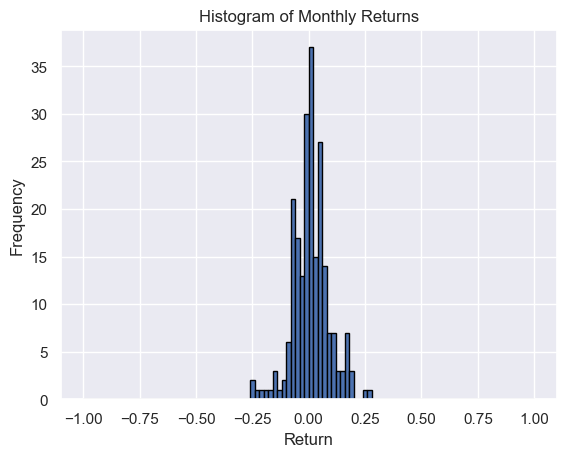

In [31]:
import matplotlib.pyplot as plt

# 假设你已经有了monthly_df DataFrame，包含了每月的回报率数据

# 创建直方图
plt.hist(monthly_df['Return'].dropna(), bins=100, range=(-1, 1), edgecolor='black')  # 需要去除空值，设置30个柱子，黑色边界线
plt.title('Histogram of Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [32]:
from scipy.stats import shapiro

# 进行Shapiro-Wilk检验
stat, p = shapiro(monthly_df['Return'].dropna())  # 需要去除空值

# 输出检验结果
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')

Shapiro-Wilk Test:
Statistic: 0.97113777112573, p-value: 0.00015470831822095066


In [9]:
print(monthly_df['Return'].count())

239
